Saving titanic.csv.zip to titanic.csv (18).zip


/tmp/ipython-input-23-4076048329.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-23-4076048329.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

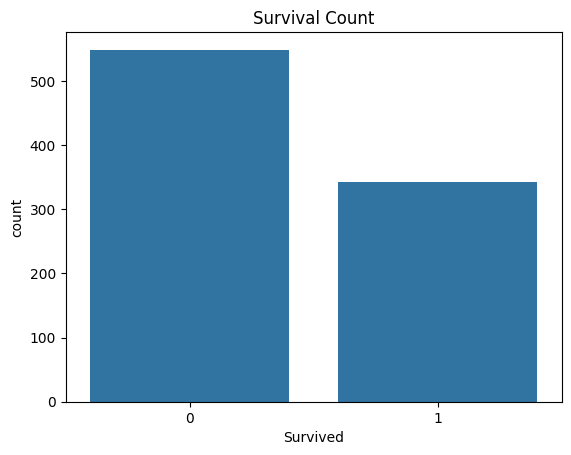

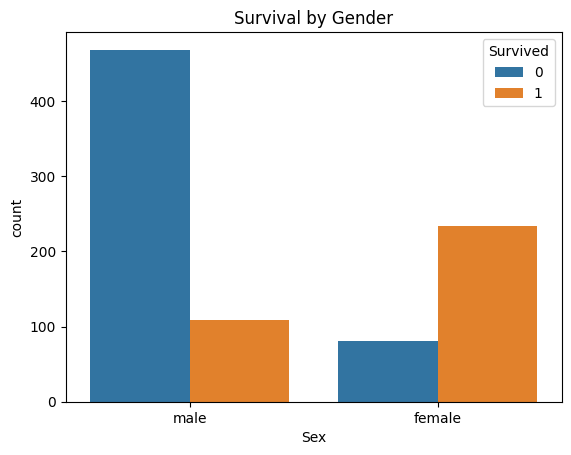

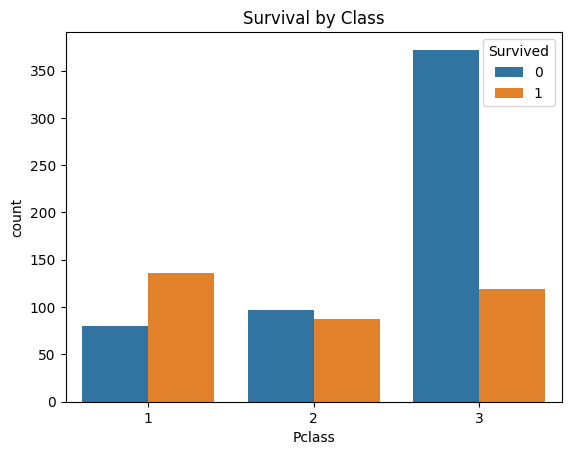

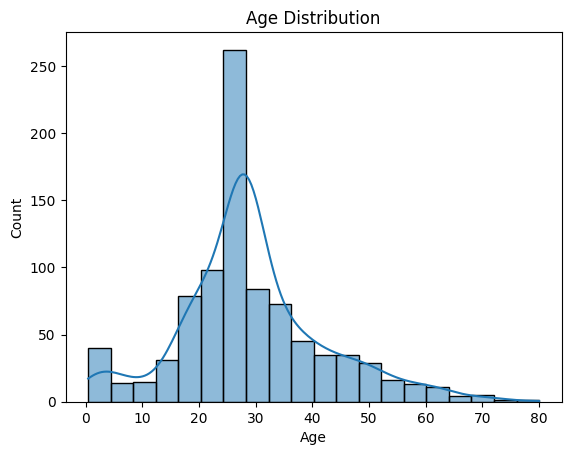

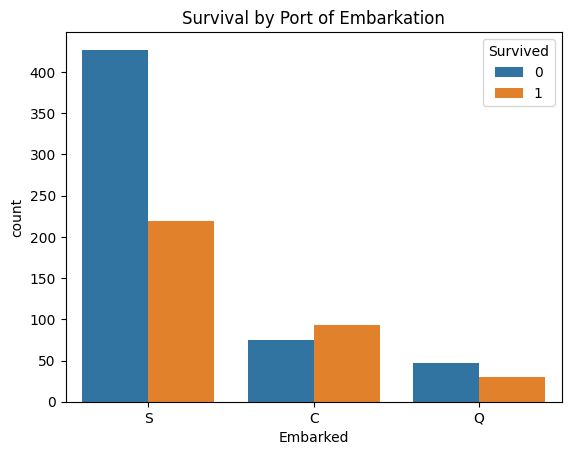

In [23]:
from google.colab import files
uploaded = files.upload()
import pandas as pd        # for working with data
import seaborn as sns      # for visualization
import matplotlib.pyplot as plt  # for plotting
import zipfile
import io# Get the byte content of the uploaded zip file
zip_bytes = uploaded['titanic.csv (18).zip']
# Use zipfile to open the zip archive in memory
with zipfile.ZipFile(io.BytesIO(zip_bytes), 'r') as zf:
    # Read the desired file ('train.csv') from the archive
    with zf.open('train.csv') as file:
        # Read the extracted file content into a pandas DataFrame
        df = pd.read_csv(file)

#df = pd.read_csv(io.BytesIO(zip_bytes), compression='zip', archive_name='train.csv')
df.head()
df.isnull().sum()
# Drop 'Cabin' and 'Ticket' (too many missing values)
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

# Fill missing 'Age' with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Port of Embarkation")
plt.show()


## Summary of Findings
- Females had a much higher survival rate than males.
- 1st class passengers were more likely to survive.
- Most passengers were from port S.
